# Perfil de intensidad imagen completa BN

Obtencion de grafica ley de Malus con datos de una camara blanco y negro DCC1545. Se usan las imagenes de la carpeta M1545_2

In [4]:
# Importamos las librerias necesarias
from pylab import * 
import numpy as np
import pandas as pd
from skimage.exposure import histogram as imhist
from skimage.color import rgb2gray 

## Analisis para una sola imagen 90°

In [5]:
# Cargamos imagen, se convierte a matriz
image = imread('../M1545_2/PP9.png')
# Utilizamos shape para conocer las propiedades de nuestra matriz
print(image.shape)

(1024, 1280, 4)


In [6]:
# Nos aseguramos que la imagen sea un array de NumPy
image = np.array(image)

# Verificamos si la imagen tiene 4 canales
if image.shape[-1] == 4:
    # Elimina el canal alfa
    image = image[..., :3]

# Convertimos la imagen a escala de grises
image = rgb2gray(image)

# Obtenemos los histogramas
hist_image, bins_image = imhist(image)

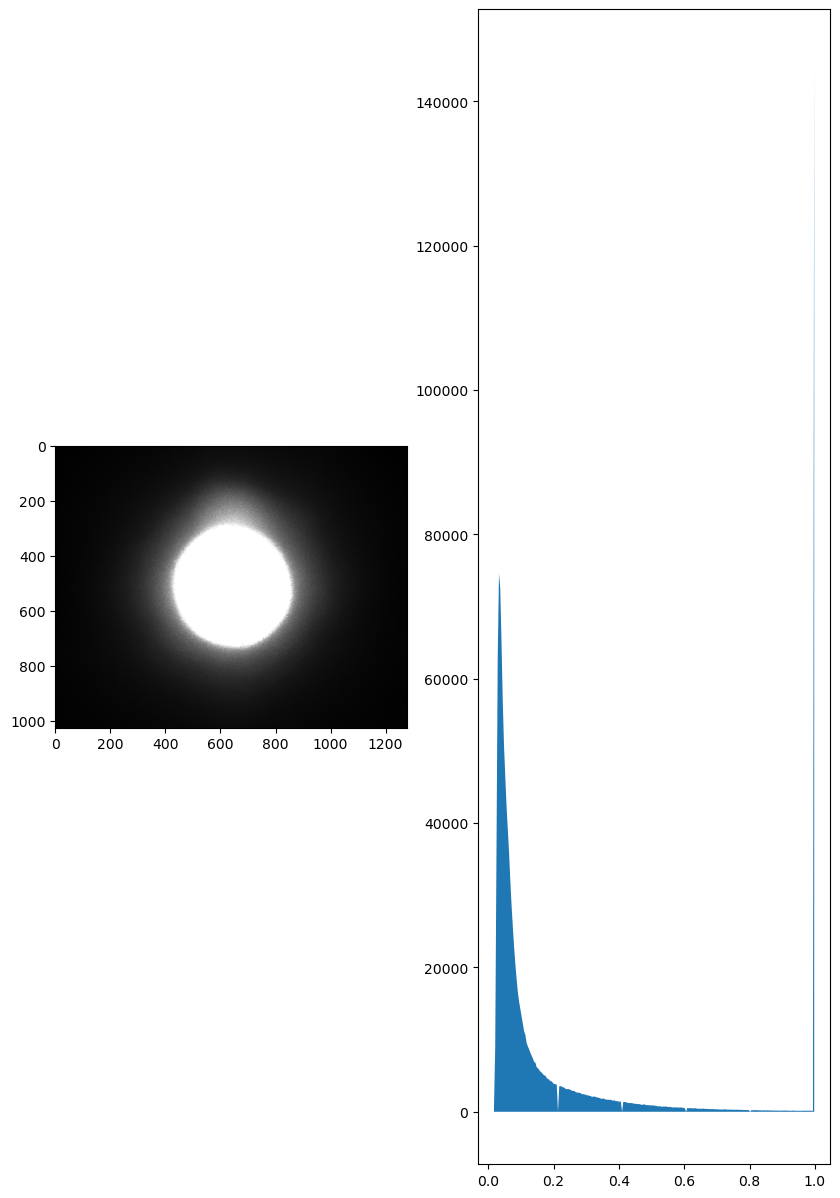

In [7]:
# Visualizamos
_, (image0, hist0), = subplots(1, 2, figsize=(10, 15))

# Original
image0.imshow(image, cmap="gray")
hist0.fill_between(bins_image, hist_image)

In [8]:
# Calculamos el promedio de intensidad
average_intensity = image.mean()

# Encontramos el valor máximo de número de píxeles y su correspondiente intensidad
max_pixel_value = hist_image.max()
max_intensity_value = bins_image[hist_image.argmax()]

print(f'Promedio de intensidad: {average_intensity}')
print(f'Punto máximo en valor de número de píxeles: {max_pixel_value}')
print(f'Máximo de intensidad: {max_intensity_value}')

Promedio de intensidad: 0.22017225623130798
Punto máximo en valor de número de píxeles: 145504
Máximo de intensidad: 0.9980774521827698


## Analisis para todas las imagenes

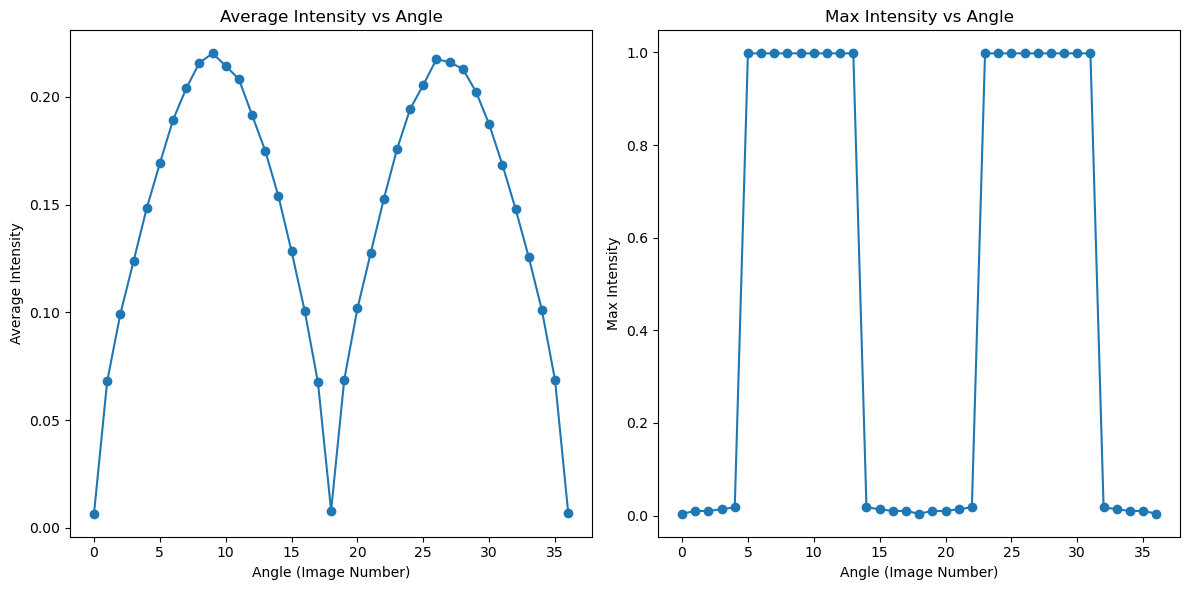

       Image  Average Intensity  Max Pixel Value  Max Intensity
0    PP0.png           0.006578           966793       0.004021
1    PP1.png           0.067932           587717       0.009766
2    PP2.png           0.099198           386938       0.009766
3    PP3.png           0.123655           264378       0.013672
4    PP4.png           0.148228           175901       0.017540
5    PP5.png           0.169122           130525       0.998055
6    PP6.png           0.189237           137542       0.998070
7    PP7.png           0.203919           142429       0.998070
8    PP8.png           0.215737           145480       0.998070
9    PP9.png           0.220172           145504       0.998077
10  PP10.png           0.214395           144125       0.998070
11  PP11.png           0.208165           142121       0.998070
12  PP12.png           0.191520           137272       0.998070
13  PP13.png           0.174963           131479       0.998062
14  PP14.png           0.153880         

In [10]:
# Lista para almacenar los resultados
results = []

# Recorremos las imágenes desde B0 hasta B36
for i in range(37):
    # Formateamos el nombre de la imagen
    img_path = f'../M1545_2/PP{i}.png'
    # Cargamos la imagen
    image = imread(img_path)
    
    # Verificamos si la imagen tiene 4 canales y eliminamos el canal alfa si es necesario
    if image.shape[-1] == 4:
        image = image[..., :3]
    
    # Convertimos la imagen a escala de grises
    image = rgb2gray(image)
    
    # Obtenemos el histograma de la imagen
    hist_image, bins_image = imhist(image)
    
    # Calculamos el promedio de intensidad
    average_intensity = image.mean()
    
    # Encontramos el valor máximo de número de píxeles y su correspondiente intensidad
    max_pixel_value = hist_image.max()
    max_intensity_value = bins_image[hist_image.argmax()]
    
    # Guardamos los resultados en la lista
    results.append({
        'Image': f'PP{i}.png',
        'Average Intensity': average_intensity,
        'Max Pixel Value': max_pixel_value,
        'Max Intensity': max_intensity_value
    })

# Convertimos los resultados a un DataFrame
df = pd.DataFrame(results)

# Graficamos el promedio de intensidad y el máximo de intensidad
angles = range(37)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(angles, df['Average Intensity'], marker='o')
plt.xlabel('Angle (Image Number)')
plt.ylabel('Average Intensity')
plt.title('Average Intensity vs Angle')

plt.subplot(1, 2, 2)
plt.plot(angles, df['Max Intensity'], marker='o')
plt.xlabel('Angle (Image Number)')
plt.ylabel('Max Intensity')
plt.title('Max Intensity vs Angle')

plt.tight_layout()
plt.show()

# Mostrar el DataFrame
print(df)


In [12]:
# Añadimos una columna con los ángulos en grados
df['Angle'] = [i * 10 for i in range(37)]

# Mostrar el DataFrame con la nueva columna
print(df)

       Image  Average Intensity  Max Pixel Value  Max Intensity  Angle
0    PP0.png           0.006578           966793       0.004021      0
1    PP1.png           0.067932           587717       0.009766     10
2    PP2.png           0.099198           386938       0.009766     20
3    PP3.png           0.123655           264378       0.013672     30
4    PP4.png           0.148228           175901       0.017540     40
5    PP5.png           0.169122           130525       0.998055     50
6    PP6.png           0.189237           137542       0.998070     60
7    PP7.png           0.203919           142429       0.998070     70
8    PP8.png           0.215737           145480       0.998070     80
9    PP9.png           0.220172           145504       0.998077     90
10  PP10.png           0.214395           144125       0.998070    100
11  PP11.png           0.208165           142121       0.998070    110
12  PP12.png           0.191520           137272       0.998070    120
13  PP

C:\Users\super\AppData\Local\Temp\ipykernel_40260\1280504508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cos^2(Angle)'] = np.cos(np.radians(df['Angle']))**2


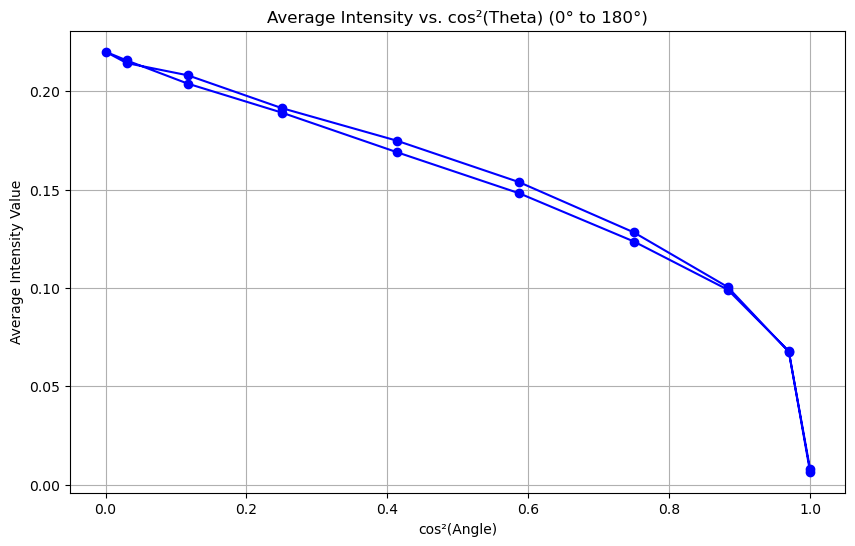

In [13]:
# Filtrar para los ángulos de 0 a 180 grados
df = df[df['Angle'] <= 180]

# Calcular cos^2(Angle) y agregarlo al DataFrame
df['cos^2(Angle)'] = np.cos(np.radians(df['Angle']))**2

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df['cos^2(Angle)'], df['Average Intensity'], marker='o', linestyle='-', color='b')
plt.xlabel('cos²(Angle)')
plt.ylabel('Average Intensity Value')
plt.title('Average Intensity vs. cos²(Theta) (0° to 180°)')
plt.grid(True)
plt.show()